Import required Packages

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_folder = r'E:\Drone Dataset\dataset\semantic_drone_dataset\original_images'
output_folder_negative = r'I:\New folder\negative_images'
output_folder_log = r'I:\New folder\log_images'
output_folder_power_law = r'I:\New folder\power_law_images'
output_folder_piecewise_linear = r'I:\New folder\piecewise_linear_images'
output_folder_high_pass_filter = r'I:\New folder\high_pass_filter_images'
output_folder_low_pass_filter = r'I:\New folder\low_pass_filter_images'
output_folder_laplacian_filter = r'I:\New folder\laplacian_filter_images'
# Create output folders if they don't exist
for folder in [output_folder_negative, output_folder_log, output_folder_power_law,
               output_folder_piecewise_linear, output_folder_high_pass_filter,
               output_folder_low_pass_filter, output_folder_laplacian_filter]:
    if not os.path.exists(folder):
        os.makedirs(folder)

In [3]:
# Function to perform negative transformation
def negative_transform(image):
    return 255 - image
# Function to perform log transformation
def log_transform(image):
    c = 255 / np.log(1 + np.max(image))
    log_transformed_image = c * (np.log(image + 1))
    return np.uint8(log_transformed_image)
# Function to perform power law transformation
def power_law_transform(image, gamma):
    return np.uint8(np.power(image / 255.0, gamma) * 255)
def piecewise_linear_transform(image):
    # Define a piecewise linear transformation lookup table
    lut = np.arange(256)
    lut[0:50] = 0  # Map pixel values 0-49 to 0
    lut[50:100] = 50  # Map pixel values 50-99 to 50
    lut[100:150] = 100  # Map pixel values 100-149 to 100
    lut[150:200] = 150  # Map pixel values 150-199 to 150
    lut[200:] = 255  # Map pixel values 200-255 to 255

    return cv2.LUT(image, lut)
# Function to apply high pass filter
def high_pass_filter(image):
    kernel_size = 3
    return cv2.filter2D(image, -1, np.array([[-1, -1, -1],
                                             [-1,  8, -1],
                                             [-1, -1, -1]]))
# Function to apply low pass filter
def low_pass_filter(image):
    kernel_size = 3
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
# Function to apply Laplacian filter
def laplacian_filter(image):
    return cv2.Laplacian(image, cv2.CV_64F)


In [4]:
# Read images from input folder
image_files = [f for f in os.listdir(input_folder) if f.endswith('.jpg')]


C:\Users\ibnes\AppData\Local\Temp\ipykernel_19332\1248186893.py:7: RuntimeWarning: divide by zero encountered in log
  log_transformed_image = c * (np.log(image + 1))
C:\Users\ibnes\AppData\Local\Temp\ipykernel_19332\1248186893.py:8: RuntimeWarning: invalid value encountered in cast
  return np.uint8(log_transformed_image)


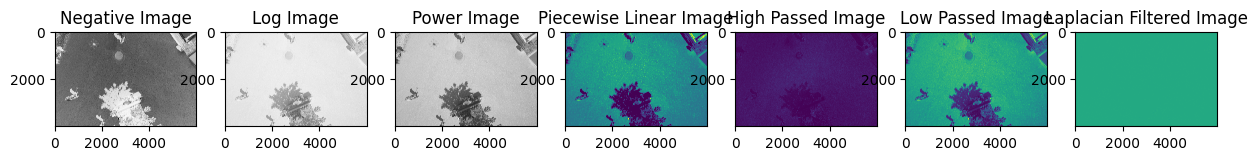

In [5]:

# Process each image and save to respective output folders
for image_file in image_files:
    input_image = cv2.imread(os.path.join(input_folder, image_file), cv2.IMREAD_GRAYSCALE)
    # Negative transformation
    negative_image = negative_transform(input_image)
    cv2.imwrite(os.path.join(output_folder_negative, image_file), negative_image)
    # Log transformation
    log_image = log_transform(input_image)
    cv2.imwrite(os.path.join(output_folder_log, image_file), log_image)
    # Power law transformation
    power_law_image = power_law_transform(input_image, gamma=0.5)
    cv2.imwrite(os.path.join(output_folder_power_law, image_file), power_law_image)
    # Piecewise linear transformation
    piecewise_linear_image = piecewise_linear_transform(input_image)
    cv2.imwrite(os.path.join(output_folder_piecewise_linear, image_file), piecewise_linear_image)
    # High pass filter
    high_pass_filtered_image = high_pass_filter(input_image)
    cv2.imwrite(os.path.join(output_folder_high_pass_filter, image_file), high_pass_filtered_image)
    # Low pass filter
    low_pass_filtered_image = low_pass_filter(input_image)
    cv2.imwrite(os.path.join(output_folder_low_pass_filter, image_file), low_pass_filtered_image)
    # Laplacian filter
    laplacian_filtered_image = laplacian_filter(input_image)
    cv2.imwrite(os.path.join(output_folder_laplacian_filter, image_file), laplacian_filtered_image)
    
     # Plotting sample images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 7, 1)
    plt.imshow(cv2.cvtColor(negative_image, cv2.COLOR_BGR2RGB))
    plt.title('Negative Image')
    plt.axis('on')
    plt.subplot(1, 7, 2)
    plt.imshow(log_image, cmap='gray')
    plt.title('Log Image')
    plt.axis('on')
    plt.subplot(1, 7, 3)
    plt.imshow(cv2.cvtColor(power_law_image.astype('uint8'), cv2.COLOR_BGR2RGB))
    plt.title('Power Image')
    plt.axis('on')
    plt.subplot(1, 7, 4)
    plt.imshow(piecewise_linear_image)
    plt.title('Piecewise Linear Image')
    plt.axis('on')
    plt.subplot(1, 7, 5)
    plt.imshow(high_pass_filtered_image)
    plt.title('High Passed Image')
    plt.axis('on')
    plt.subplot(1, 7, 6)
    plt.imshow(low_pass_filtered_image)
    plt.title('Low Passed Image')
    plt.axis('on')
    plt.subplot(1, 7, 7)
    plt.imshow(laplacian_filtered_image)
    plt.title('Laplacian Filtered Image')
    plt.axis('on')
    plt.show()

